<a href="https://colab.research.google.com/github/gregorywmorris/MLZoom2022/blob/main/Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Guided Project: Car Price Prediction

###Creating a car MSRP prediction

In [145]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 
# So that plots show porperly in a notebook

#Data Preparation

In [146]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
!wget $data

--2022-09-17 22:48:20--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>]   1.41M  --.-KB/s    in 0.07s   

2022-09-17 22:48:21 (19.8 MB/s) - ‘data.csv.2’ saved [1475504/1475504]



In [147]:
df = pd.read_csv('data.csv')
len(df) #Rows of data

11914

In [148]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [149]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Data columns are inconsistent

In [150]:
# Normalize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [151]:
# Normalize string values, we need the object type colums only
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [152]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [153]:
for col in strings:
  df[col] = df[col].str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploritory Data Analysis (EDA)

In [154]:
for col in df.columns:
  print(col)
  print(df[col].unique()[:5]) # we don't need to repeat values and want to limit howe much prints
  print(df[col].nunique()) # count of unique values
  print() # line break

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

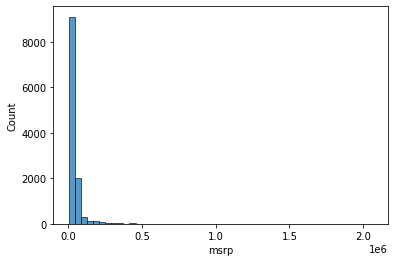

In [155]:
#Graphing price column
sns.histplot(df.msrp, bins=50) #Bins are the number of bars

Distribution is right skewd, this can affect model accuracy.

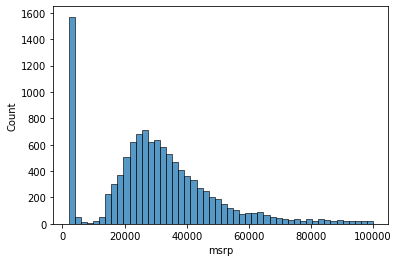

In [156]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

Data now shows as bimodal

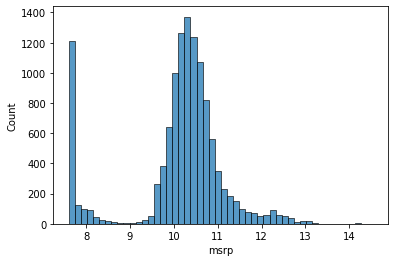

In [157]:
#Log values to normalize the distribution and add 1 in case of log 0
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)

Notice the now reduced tail, the distribution is now closer to normal

In [158]:
#Missing value exploration. Summing shows us how manny missing values and we can see by column
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

#Setting up the Validation Framework

In [159]:
#Getting 20% from data, need integer to split rowns correctly
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test #Beacuse we forced whole number rounding, the total won't add up correctly if wjust used *0.6

In [160]:
n, n_val + n_test + n_train #Sanity Check

(11914, 11914)

In [161]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:] 

df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560


In [162]:
#Randomize the data set so that the data is distributed in all sets such that no one make is all in a single data set. 
idx = np.arange(n)
np.random.seed(2) #so that we get the same random each time it is run
np.random.shuffle(idx)

In [163]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]] 

df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [164]:
len(df_train), len(df_val), len(df_test) #Sanity Check

(7150, 2382, 2382)

In [165]:
# Reset index so that they match the new dataframe
df_train = df_train.reset_index(drop=True)
df_val = df_train.reset_index(drop=True)
df_test = df_train.reset_index(drop=True)

df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [166]:
#.values gives us a numpy array instead of the dataframe that we would get without it. The added overhead od a dataframe is not needed.
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_train.msrp.values)
y_test = np.log1p(df_train.msrp.values)

y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [167]:
# Delete the msrp from the dataframe, else the model won't have a target variable to guess. It will be perfect every time!
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [168]:
df_train.describe()
# MSRP is has now been removed

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
count,7150.000000,7110.000000,7136.000000,7144.000000,7150.000000,7150.000000,7150.000000
mean,2010.279161,249.081294,5.628363,3.431691,26.684056,19.778601,1540.346573
std,7.653596,109.473571,1.777159,0.884216,9.284286,9.122229,1435.834893
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000
50%,2015.000000,225.000000,6.000000,4.000000,26.000000,18.000000,1385.000000
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000


#Linear Regression

In [169]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [170]:
# Lets use Horespower, MPG, and poularity. Formula is g(xi) = W0 (prediction) + w1*xi1 + w2*xi2 + w3*xi3 (weight * features)
# for the rolls-royce shown above
xi = [453,11,86]
# Default value
w0 = 7.17 
# weights given for chosen features
w = [0.01,0.04,0.002]

In [171]:
def dot(xi, w):
  n = len(xi)
  res = 0.0

  for j in range(n):
    res = res + xi[j] * w[j]
  return res

In [172]:
# includes the default value
w_new = [w0] +w

In [173]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [174]:
def linear_regression(xi):
  # The one is the default feature, i.e what makes the default value the default value. In this case just being a car.
  xi = [1] + xi
  return dot(xi, w_new)

In [175]:
#test
linear_regression(xi) 

12.312

In [176]:
# Undue the log +1
round(np.expm1(12.312),2)

222347.22

In [177]:
# Made up example to test using multiple rows
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [178]:
def linear_regression(X):
  return X.dot(w_new)

In [179]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

#Train a Linear regression Model

In [180]:
'''def train_linear_regression(X, y)
  pass
  return'''

'def train_linear_regression(X, y)\n  pass\n  return'

In [181]:
#Artificial data for learning purpose provided by Alex
X= [
    [148, 24,1385],
    [132,25,2031],
    [453,11,86],
    [158,24,185],
    [172,25,201],
    [413,11,86],
    [38,54,185],
    [142,25,431],
    [453,31,86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [182]:
# Add in the bias (default) value of car before calculating features. 
#ones = np.ones(X.shape[0])
#ones

In [183]:
# X = np.column_stack([ones, X])

In [184]:
# y values provided by Alex
y = [10000,20000,15000,20050,10000,20000,15000,25000,12000]

In [185]:
# w = (XTX)**-1(XTy)

XTX = X.T.dot(X)

In [186]:
XTX_inv = np.linalg.inv(XTX)

In [187]:
# Identity matrix
#XTX.dot(XTX_inv).round(1)

In [188]:
w_full = XTX_inv.dot(X.T).dot(y)

In [189]:
# bias value
w0 = w_full[0]
# features
w = w_full[1:]

In [190]:
w0, w

(26.08419497680291, array([286.12285934,   3.93813107]))

In [191]:
# Error in function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [192]:
train_linear_regression(X,y)

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

# Train

In [193]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [194]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [195]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [196]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg', 'popularity']

In [197]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [198]:
# Fill na with 0, model will ignore these values. This isn ot always the best solution. 
X_train = df_train[base].fillna(0).values

In [199]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [200]:
w0, w = train_linear_regression(X_train, y_train)

In [201]:
# Our predictions
y_pred = w0 + X_train.dot(w)

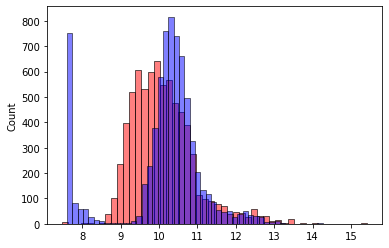

In [202]:
#Comparison to target
sns.histplot(y_pred, color = 'red', alpha=0.5, bins=50)
sns.histplot(y_train,color='blue', alpha=0.5, bins=50)


Model under predicts, this may be due to the large number of cars on the left of train

###Root Mean Squared Error (RMSE)
A quantitative measure of fit

In [203]:
def rmse(y, y_pred):
  se = (y - y_pred)**2
  mse = se.mean()
  return np.sqrt(mse)


In [204]:
rmse(y_train, y_pred)

0.7554192603920132

#Validation

In [205]:
#Data Cleaning
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [206]:
x_train = prepare_X(df_train)
wo, w = train_linear_regression(x_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7554192603920132

#Simple Feature Engeneering

In [207]:
#When was data collected
df_train.year.max()

2017

In [208]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [209]:
def prepare_X(df):
  # Copy to protect original data
    df = df.copy()
    # New feature
    df['age'] = 2017 - df.year
    features = base + ['age']

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [210]:
X_train = prepare_X(df_train)

In [211]:
#6th column not showing
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]])

In [212]:
x_train = prepare_X(df_train)
wo, w = train_linear_regression(x_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

1.4547527994968135

#Categorical Variables

In [68]:
#Number of doors is actually categorical and not numerical (2 door vs 4 door)
df_train.dtypes.number_of_doors

dtype('float64')

In [140]:
# Code to create categorical values for doors
'''for v in [2,3,4]:
  df['num_door_%s' % v] = (df_train.number_of_doors == v).astype('int')'''

"for v in [2,3,4]:\n  df['num_door_%s' % v] = (df_train.number_of_doors == v).astype('int')"

In [141]:
def prepare_X(df):
  # Copy to protect original data
    df = df.copy()
    features = base.copy()
    # New feature
    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2,3,4]:
      df['num_door_%s' % v] = (df.number_of_doors == v).astype('int')
      features.append('num_door_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X


In [142]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [143]:
# Test model again

x_train = prepare_X(df_train)
wo, w = train_linear_regression(x_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

2.7799588408910263